In [ ]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import gc

In [ ]:
!wget imagen1.png https://github.com/juannieu/VPC1/raw/main/TP4/Imagen1.png
!wget imagen2.png https://github.com/juannieu/VPC1/raw/main/TP4/Imagen2.png
!wget imagen3.png https://github.com/juannieu/VPC1/raw/main/TP4/Imagen3.png
!wget imagen4.png https://github.com/juannieu/VPC1/raw/main/TP4/Imagen4.png
!wget imagen5.png https://github.com/juannieu/VPC1/raw/main/TP4/Imagen5.png

--2022-04-19 14:48:08--  http://imagen1.png/
Resolving imagen1.png (imagen1.png)... failed: Name or service not known.
wget: unable to resolve host address ‘imagen1.png’
--2022-04-19 14:48:08--  https://github.com/juannieu/VPC1/raw/main/TP4/Imagen1.png
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/juannieu/VPC1/main/TP4/Imagen1.png [following]
--2022-04-19 14:48:09--  https://raw.githubusercontent.com/juannieu/VPC1/main/TP4/Imagen1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10940 (11K) [image/png]
Saving to: ‘Imagen1.png’

Imagen1.png         100%[===================>]  10.68K  --.-KB

In [ ]:
imgColor2=cv.imread('Imagen5.png')
imgGr=cv.cvtColor(imgColor2,cv.COLOR_BGR2GRAY)
pixelUsado=imgGr[2][2]
j=clockwise(imgGr,2,2,pixelUsado)
print(pixelUsado)
print(j)

120
4


In [ ]:
def elebepe(imagen):
  #Defino el radio
  radio=1
  #Abrimos la imagen
  imgColor=cv.imread(imagen)
  #Transformamos la Imagen a Escala de Grises
  imagenEnGrises=cv.cvtColor(imgColor,cv.COLOR_BGR2GRAY)
  #Obtenemos las dimensiones de la imagen
  dimensionesH,dimensionesV= imagenEnGrises.shape

  imgresp=np.empty((dimensionesH-1,dimensionesV-1),dtype=int)
  #print(imgresp)

  
  #Recorro cada pixel, obviando bordes
  for indiceH in range(radio,dimensionesH-radio):
    for indiceV in range(radio,dimensionesV-radio):
      pix=imagenEnGrises[indiceH][indiceV]
      imgresp[indiceH][indiceV]=clockwise(imagenEnGrises,indiceH,indiceV,pix)

  #print(imgresp,file=open("output.txt","a"))     
  #Imagen del ángulo
  #plt.figure()
  #plt.imshow(imgresp)
  #plt.show()
  return imgresp


def clockwise(imagenGris,indiceH,indiceV,valPixel):
  elArray = np.empty(8, dtype=float)
  val0=(0 if imagenGris[indiceH-1][indiceV]<valPixel else 1)
  val1=(0 if imagenGris[indiceH-1][indiceV+1]<valPixel else 1)*(2**1)
  val2=(0 if imagenGris[indiceH][indiceV+1]<valPixel else 1)*(2**2)
  val3=(0 if imagenGris[indiceH+1][indiceV+1]<valPixel else 1)*(2**3)
  val4=(0 if imagenGris[indiceH+1][indiceV]<valPixel else 1)*(2**4)
  val5=(0 if imagenGris[indiceH+1][indiceV-1]<valPixel else 1)*(2**5)
  val6=(0 if imagenGris[indiceH][indiceV-1]<valPixel else 1)*(2**6)
  val7=(0 if imagenGris[indiceH-1][indiceV-1]<valPixel else 1)*(2**7)

  '''print('Val0 es ',val0)
  print('Val1 es ',val1)
  print('Val2 es ',val2)
  print('Val3 es ',val3)
  print('Val4 es ',val4)
  print('Val5 es ',val5)
  print('Val6 es ',val6)
  print('Val7 es ',val7)'''

  suma=val0+val1+val2+val3+val4+val5+val6+val7
  return suma

In [ ]:
nombres=['Imagen1.png','Imagen2.png','Imagen3.png','Imagen4.png','Imagen5.png']
for imag in nombres:
  img_proc=elebepe(imag)

  cv.imwrite('post_proc'+imag,img_proc)

  gc.collect()

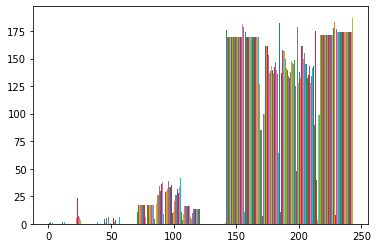

In [ ]:
fac=[0,1,2,4,8,16,32,64,128,256]
imgH=cv.imread('post_procImagen1.png')
imgHGris=cv.cvtColor(imgH,cv.COLOR_BGR2GRAY)
plt.hist(imgHGris,bins=fac)

(array([[ 14.,   1.,   0., ...,  13.,  31.,  99.],
        [ 12.,   2.,   2., ...,  13.,  19., 101.],
        [ 10.,   0.,   5., ...,  16.,  31., 103.],
        ...,
        [  5.,   3.,   2., ...,  19.,  38.,  90.],
        [ 16.,   5.,   5., ...,   9.,  31.,  89.],
        [ 14.,   2.,   1., ...,  14.,  29., 115.]]),
 array([  0,   1,   2,   4,   8,  16,  32,  64, 128, 256]),
 <a list of 187 Lists of Patches objects>)

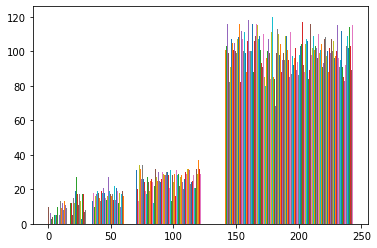

In [ ]:
fac=[0,1,2,4,8,16,32,64,128,256]
imgH=cv.imread('post_procImagen2.png')
imgHGris=cv.cvtColor(imgH,cv.COLOR_BGR2GRAY)
plt.hist(imgHGris,bins=fac)

(array([[  0.,   0.,   0., ...,   0.,   0., 188.],
        [  2.,   0.,   2., ...,   5.,  22., 153.],
        [  5.,   0.,   1., ...,   7.,  23., 145.],
        ...,
        [  2.,   1.,   0., ...,   7.,  35., 141.],
        [  0.,   1.,   0., ...,   6.,  28., 148.],
        [  2.,   0.,   0., ...,   8.,  21., 152.]]),
 array([  0,   1,   2,   4,   8,  16,  32,  64, 128, 256]),
 <a list of 195 Lists of Patches objects>)

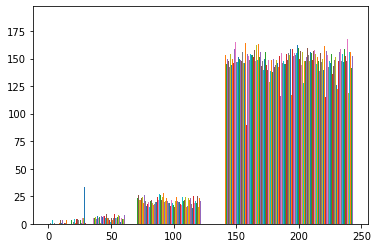

In [ ]:
fac=[0,1,2,4,8,16,32,64,128,256]
imgH=cv.imread('post_procImagen3.png')
imgHGris=cv.cvtColor(imgH,cv.COLOR_BGR2GRAY)
plt.hist(imgHGris,bins=fac)

(array([[  5.,   0.,   0., ...,   2.,  21., 146.],
        [  3.,   1.,   0., ...,  17.,  21., 118.],
        [  1.,   0.,   0., ...,   9.,  30., 134.],
        ...,
        [  1.,   0.,   1., ...,  22.,  35., 124.],
        [  1.,   0.,   0., ...,  18.,  33., 128.],
        [  1.,   0.,   0., ...,  21.,  31., 100.]]),
 array([  0,   1,   2,   4,   8,  16,  32,  64, 128, 256]),
 <a list of 187 Lists of Patches objects>)

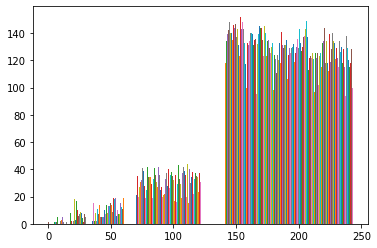

In [ ]:
fac=[0,1,2,4,8,16,32,64,128,256]
imgH=cv.imread('post_procImagen4.png')
imgHGris=cv.cvtColor(imgH,cv.COLOR_BGR2GRAY)
plt.hist(imgHGris,bins=fac)

(array([[ 11.,   3.,   1., ...,  15.,  30., 101.],
        [ 12.,   1.,   5., ...,  20.,  27.,  99.],
        [ 20.,   3.,   5., ...,  13.,  23.,  97.],
        ...,
        [ 11.,   4.,   4., ...,  18.,  28.,  86.],
        [ 18.,   2.,   6., ...,  19.,  21.,  90.],
        [ 11.,   3.,   6., ...,  18.,  23., 106.]]),
 array([  0,   1,   2,   4,   8,  16,  32,  64, 128, 256]),
 <a list of 190 Lists of Patches objects>)

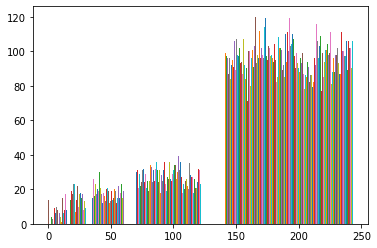

In [ ]:
fac=[0,1,2,4,8,16,32,64,128,256]
imgH=cv.imread('post_procImagen5.png')
imgHGris=cv.cvtColor(imgH,cv.COLOR_BGR2GRAY)
plt.hist(imgHGris,bins=fac)